In [11]:
from collections import Counter
from textblob import TextBlob
from textblob import classifiers
import pdftotext
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
text1 = []
name = input("Enter the name of the book ")
name = name + ".pdf"
pdf_object = open(name, 'rb')
pdf = pdftotext.PDF(pdf_object)
string = ''
for page in pdf:
    string += page
    string += '\n'
mac = TextBlob(string)

Enter the name of the book The Alchemist


In [13]:
# for words, tag in mac.tags:
#     print(words, tag)
    
for sentence in mac.sentences:
        k = sentence.split()
        k = k.lemmatize()
        text1 += k



In [14]:
print(text1)

['The', 'Alchemist', 'Paulo', 'Coelho', 'Translated', 'by', 'Alan', 'R.', 'Clarke.', 'Published', '1992.', 'ISBN', '0-7225-3293-8.', 'PART', 'ONE', 'The', "boy's", 'name', 'wa', 'Santiago.', 'Dusk', 'wa', 'falling', 'a', 'the', 'boy', 'arrived', 'with', 'his', 'herd', 'at', 'an', 'abandoned', 'church.', 'The', 'roof', 'had', 'fallen', 'in', 'long', 'ago,', 'and', 'an', 'enormous', 'sycamore', 'had', 'grown', 'on', 'the', 'spot', 'where', 'the', 'sacristy', 'had', 'once', 'stood.', 'He', 'decided', 'to', 'spend', 'the', 'night', 'there.', 'He', 'saw', 'to', 'it', 'that', 'all', 'the', 'sheep', 'entered', 'through', 'the', 'ruined', 'gate,', 'and', 'then', 'laid', 'some', 'plank', 'across', 'it', 'to', 'prevent', 'the', 'flock', 'from', 'wandering', 'away', 'during', 'the', 'night.', 'There', 'were', 'no', 'wolf', 'in', 'the', 'region,', 'but', 'once', 'an', 'animal', 'had', 'strayed', 'during', 'the', 'night,', 'and', 'the', 'boy', 'had', 'had', 'to', 'spend', 'the', 'entire', 'next', '

In [15]:
counts = Counter(text1)

In [16]:
print(len(counts))

5483


In [19]:
df = pd.read_excel("newdata.xlsx")
df = df.drop("Trust",1)
df2 = df.loc[df["Words"].isin(text1)]
df2

,Words,Positive,Negative,Anger,Disgust,Fear,Joy,Sadness,Surprise
2,abandon,0,1,0,0,1,0,1,0
3,abandoned,0,1,1,0,1,0,1,0
75,accept,0,0,0,0,0,0,0,0
78,access,0,0,0,0,0,0,0,0
89,accompany,0,0,0,0,0,0,0,0
93,accomplished,1,0,0,0,0,1,0,0
95,accord,1,0,0,0,0,0,0,0
96,accordance,0,0,0,0,0,0,0,0
118,accustomed,0,0,0,0,0,0,0,0
122,achieve,1,0,0,0,0,1,0,0


In [20]:
df2_positive = df2["Words"][df2.Positive == 1]
df2_negative = df2["Words"][df2.Negative == 1]
df2_anger = df2["Words"][df2.Anger == 1]
df2_disgust = df2["Words"][df2.Disgust == 1]
df2_fear = df2["Words"][df2.Fear == 1]
df2_joy = df2["Words"][df2.Joy == 1]
df2_surprise = df2["Words"][df2.Surprise == 1]
df2_sadness = df2["Words"][df2.Sadness == 1]

k = df2['Words']
dictionary_of_words = {}
for word in k:
        dictionary_of_words[word] = text1.count(word)

In [21]:
positive = 0
negative = 0
anger = 0
disgust = 0
fear = 0
joy = 0
surprise = 0
sadness = 0

In [22]:
for words in df2_positive:
    a = dictionary_of_words[words]
    positive += a

for words in df2_negative:
    a = dictionary_of_words[words]
    negative += a

for words in df2_disgust:
    a = dictionary_of_words[words]
    disgust += a

for words in df2_fear:
    a = dictionary_of_words[words]
    fear += a

for words in df2_joy:
    a = dictionary_of_words[words]
    joy += a

for words in df2_sadness:
    a = dictionary_of_words[words]
    sadness += a

for words in df2_surprise:
    a = dictionary_of_words[words]
    surprise += a
    
for words in df2_anger:
    a = dictionary_of_words[words]
    anger += a


In [23]:
print(positive)
print(negative)

1272
1158


In [24]:
print(anger)
print(disgust)
print(fear)
print(joy)
print(sadness)

361
655
476
587
356


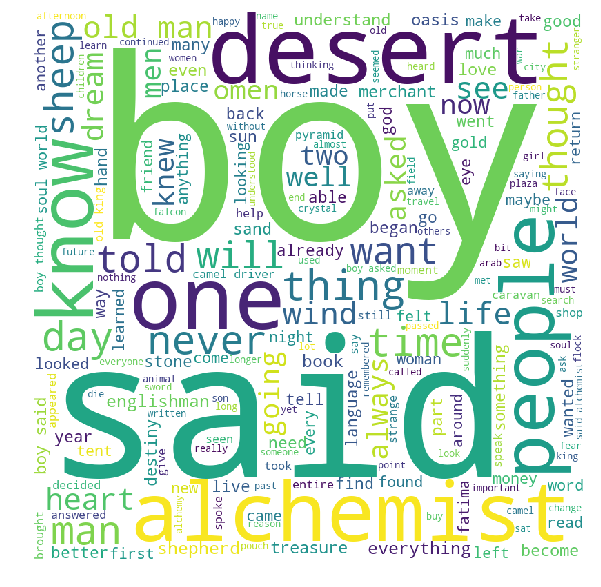

In [25]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in mac.sentences:

    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    for words in tokens:
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

(-1.1726913773758774,
 1.1349945214557338,
 -1.1942651654315466,
 1.1291629229447155)

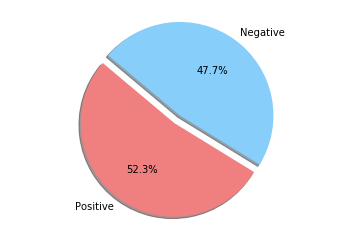

In [26]:
labels = 'Positive', 'Negative'
sizes = [positive, negative]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
plt.figure(1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

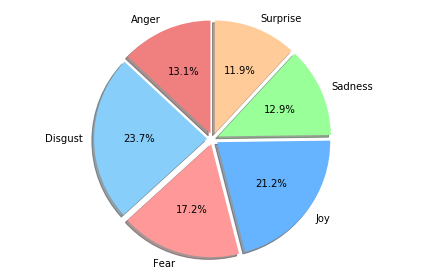

In [27]:
labels = 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise'
sizes = [anger, disgust, fear, joy, sadness, surprise]
colors = [ 'lightcoral', 'lightskyblue','#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [28]:
df = pd.read_csv("ISEAR_1.csv")
df = df[['Context', 'Emotion']]
my_list = df.values.tolist()
tuples = ()
training_set = []
testing_set = []

In [31]:
import random
n = []
m = random.sample(my_list, 7200)
for k in my_list:
    if k not in m:
        n.append(k)

for lists in m:
    k = tuple(lists)
    training_set.append(k)

for lists in n:
    k = tuple(lists)
    testing_set.append(k)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [32]:
from textblob import classifiers
classifier = classifiers.NaiveBayesClassifier(training_set)
print("SUCCESS")

Number of rows in total set: 7516
Number of train set: 5637
Number of test set: 1879


In [33]:
print(classifier.accuracy(testing_set))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
dictionary = {}
for sentence in mac.sentences:
        blob = TextBlob(str(sentence), classifier=classifier)
        print(sentence,   blob.classify())
        dictionary[sentence] = blob.classify() 
        print("=========================")

In [38]:
context_emotion = []
for sentence in mac.sentences:
    context_emotion.append(str(dictionary[sentence]))

Accuracy Score:0.5465673230441724


ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [30]:
print(context_emotion)

['sadness', 'guilt', 'shame', 'sadness', 'disgust', 'guilt', 'shame', 'sadness', 'sadness', 'sadness', 'disgust', 'anger', 'joy', 'disgust', 'joy', 'sadness', 'disgust', 'disgust', 'sadness', 'sadness', 'anger', 'sadness', 'disgust', 'disgust', 'disgust', 'sadness', 'sadness', 'sadness', 'sadness', 'disgust', 'shame', 'disgust', 'disgust', 'joy', 'disgust', 'fear', 'disgust', 'disgust', 'disgust', 'joy', 'joy', 'shame', 'fear', 'disgust', 'fear', 'joy', 'anger', 'disgust', 'disgust', 'shame', 'joy', 'disgust', 'sadness', 'disgust', 'sadness', 'sadness', 'anger', 'joy', 'joy', 'sadness', 'joy', 'shame', 'sadness', 'disgust', 'shame', 'disgust', 'joy', 'shame', 'sadness', 'anger', 'sadness', 'shame', 'sadness', 'anger', 'guilt', 'joy', 'disgust', 'sadness', 'sadness', 'fear', 'sadness', 'anger', 'joy', 'disgust', 'sadness', 'fear', 'joy', 'fear', 'shame', 'disgust', 'guilt', 'sadness', 'joy', 'sadness', 'fear', 'disgust', 'anger', 'anger', 'sadness', 'shame', 'guilt', 'fear', 'disgust', 

In [31]:
print(len(context_emotion))

7183


In [32]:
sadness_ct = context_emotion.count("sadness")
guilt_ct = context_emotion.count("guilt")
joy_ct = context_emotion.count("joy")
shame_ct = context_emotion.count("shame")
disgust_ct = context_emotion.count("disgust")
fear_ct = context_emotion.count("fear")
anger_ct = context_emotion.count("anger")

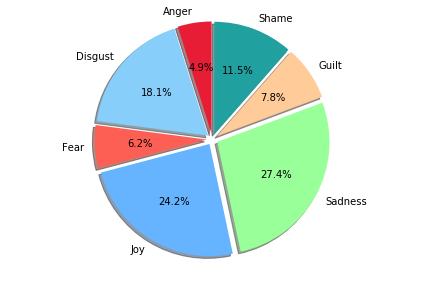

In [33]:
labels = 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Guilt', 'Shame'
sizes = [anger_ct, disgust_ct, fear_ct, joy_ct, sadness_ct, guilt_ct, shame_ct]
colors = [ '#E71D36', 'lightskyblue','#FE5F55', '#66b3ff', '#99ff99', '#ffcc99', "#21A0A0"]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.show()



In [ ]:
mac1 = TextBlob("Banned Steve Smith and David Warner won't be playing any of  .. 

Read more at:
http://timesofindia.indiatimes.com/articleshow/66802723.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst")